In [4]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'FER-2013（dataset）/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'FER-2013（dataset）/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/50
448/448 [==============================] - 93s 205ms/step - loss: 1.7972 - accuracy: 0.2637 - val_loss: 1.6732 - val_accuracy: 0.3454
Epoch 2/50
448/448 [==============================] - 8s 18ms/step - loss: 1.6108 - accuracy: 0.3721 - val_loss: 1.5286 - val_accuracy: 0.4255
Epoch 3/50
448/448 [==============================] - 8s 18ms/step - loss: 1.5050 - accuracy: 0.4231 - val_loss: 1.4296 - val_accuracy: 0.4570
Epoch 4/50
448/448 [==============================] - 8s 19ms/step - loss: 1.4353 - accuracy: 0.4517 - val_loss: 1.3921 - val_accuracy: 0.4658
Epoch 5/50
448/448 [==============================] - 8s 19ms/step - loss: 1.3732 - accuracy: 0.4773 - val_loss: 1.3317 - val_accuracy: 0.4940
Epoch 6/50
448/448 [==============================] - 8s 19ms/step - loss: 1.3276 - accuracy: 0.4945 - val_loss: 1.2897 - val_accuracy: 0.5085
Epoch 7/50
448/448 [==============================] - 8

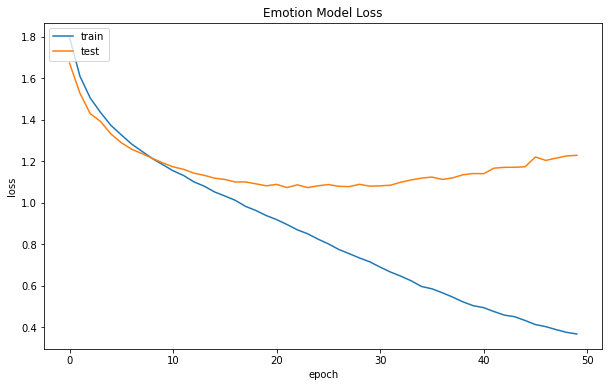

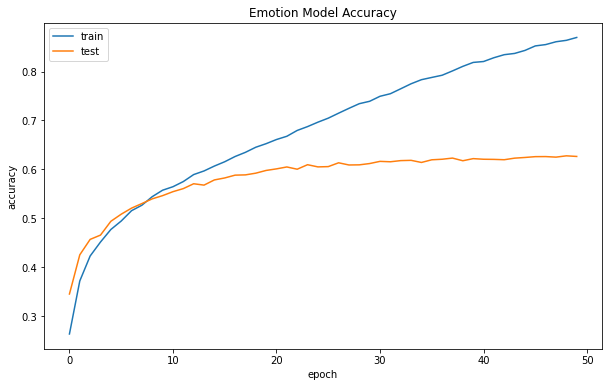

In [5]:
#create a graph to show accuracy and loss
plt.figure(figsize=(10,6))
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Emotion Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Emotion Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [3]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('test_model.h5')
print("Saved model to disk")

Saved model to disk
